In [1]:
# This is SmallTrain v0.2.1 Demo for image detection
# You can get v0.2.1 on https://github.com/geek-guild/smalltrain .

In [2]:
import smalltrain as st

try to get_logger_module from config file: logging.conf
Faild to get_logger_module from config file: logging.conf with error: 'formatters'
try to get_logger_module from config file: ggutils_logging.ini
Faild to get_logger_module from config file: ggutils_logging.ini with error: 'formatters'
try to get_logger_module from config file: logging.conf
Faild to get_logger_module from config file: logging.conf with error: 'formatters'
try to get_logger_module from config file: ggutils_logging.ini
Faild to get_logger_module from config file: ggutils_logging.ini with error: 'formatters'
try to get_logger_module from config file: logging.conf
Faild to get_logger_module from config file: logging.conf with error: 'formatters'
try to get_logger_module from config file: ggutils_logging.ini
Faild to get_logger_module from config file: ggutils_logging.ini with error: 'formatters'


In [3]:
from smalltrain.model.operation import Operation

#  Load trained model using an operation setting file for prediction
setting_file_path = '/var/smalltrain/tutorials/image_recognition/operation/IR_2D_CNN_V2_l49-c64_TUTORIAL-DEBUG-WITH-SMALLDATASET-20200708-TRAIN.json'
operation = Operation(setting_file_path=setting_file_path)
operation.auto()

# Get trained model instance
model_ins = operation.model


try to load smalltrain modules from Python library
smalltrain modules are ready to be loaded from Python library
tf.__version__: 2.1.0
tf_major_version: 2
from tensorflow_addons.image import rotate
update_hyper_param_from_file with setting_file_path: /var/smalltrain/tutorials/image_recognition/operation/IR_2D_CNN_V2_l49-c64_TUTORIAL-DEBUG-WITH-SMALLDATASET-20200708-TRAIN.json
init hparams_dict: {'model_prefix': 'nn', 'learning_rate': 0.0001, 'prediction_mode': None, 'save_root_dir': '/var/data/smalltrain/results/', 'init_model_path': '/var/smalltrain/tutorials/image_recognition/model/IR_2D_CNN_V2_l49-c64_TUTORIAL-20200708-TRAIN/model-nn_lr-0.0001_bs-128.ckpt-99', 'restore_var_name_list': None, 'untrainable_var_name_list': None, 'batch_size': 128, 'evaluate_in_minibatch': False, 'multiprocessing': True, 'max_threads': 40, 'iter_to': 100, 'dropout_ratio': 0.4, 'train_id': 'IR_2D_CNN_V2_l49-c64_TUTORIAL-DEBUG-WITH-SMALLDATASET-20200708-TRAIN', 'model_id': '2D_CNN_V2', 'model_type': 'CLASS

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1752: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


n_cnn_layers:48
n_res_block:24
n_cnn_layers_without_res_net:0
cnn_weight_stddev is set with 0.1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
########## model/res_block_0/cnn_layer_0/ ########## input x shape:<unknown> ########## W_conv:(3, 3, 3, 8) ########## pool:1 ########## has_batch_norm:True ########## actf:<function relu6 at 0x7fe82e6cca60> ########## cnn_weight_stddev:0.1 ########## cnn_bias_value:0.1 ##########
Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.
batch_norm with tf version: 2
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
No need to add_s

In [4]:
# Load other libraries
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import math

test_img_batch shape: (1, 32, 32, 3)


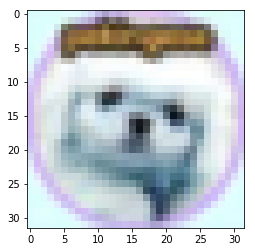

In [5]:
# Testing the model prediction for 1 input data

# Using a dog image in CIFAR-10 test images
img_file_path = '/var/data/cifar-10-image/test_batch/test_batch_i9027_c5.png'
raw_img = cv2.imread(img_file_path)
plt.imshow(raw_img)

test_img_batch = np.asarray([raw_img])
print('test_img_batch shape: {}'.format(test_img_batch.shape))


In [6]:
# Predict for the a dog image

result_dist = model_ins.sess.run(
    [model_ins.y], feed_dict={model_ins.x: test_img_batch,
                             model_ins.is_train:False,
                             model_ins.keep_prob:1}  
)   


In [7]:
# Check the output of  the model
result_dist = result_dist[0][0]
label = np.argmax(result_dist)
print('Predicted output as label: {}'.format(label))


Predicted output as label: 5


In [8]:
# Prepare CIFAR-10 label name dictionary to convert label to label name
label_name_dict = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

print(label_name_dict)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [9]:
# Check the predicted label name
print('Predicted output as label: {}, name: {}'.format(label, label_name_dict[label]))

Predicted output as label: 5, name: dog


Predicted distribution: [1.4428482911257554, 1.0175167478469282, 0.08322942582886397, 795.216289214222, 0.20995174475110692, 4949.047329819961, 0.10650188950223065, 3.4985410502913195, 0.48429078303380346, 0.021622489402898515]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

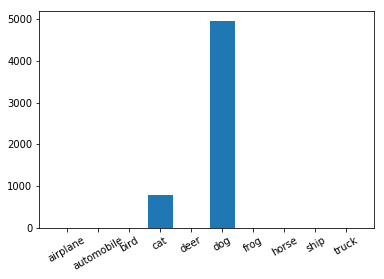

In [11]:
# Check the predicted distribution
log_result_dist = [math.exp(x) for x in result_dist]
print('Predicted distribution: {}'.format(log_result_dist))
plt.bar(list(label_name_dict.values()), log_result_dist)
plt.xticks(rotation=30)